In [8]:
%pylab nbagg

Populating the interactive namespace from numpy and matplotlib


In [9]:
gpt = []
import os, glob
for fn in glob.glob("2018-02-09*.log"):
    with open(fn) as src :
        #with open(fn+".cur", "w") as dst:
            for l in src:
                if ("None" in l) or ("#" in l):
                    continue
                N = l.index("N")
                g = l[N:N+21]
                lat = int(g[1:3])+float(g[3:10])/60
                lon = int(g[12:14])+float(g[14:])/60
                pm = float(l[N+21:].split()[0])
                #print("%10.6f %10.6f %s"%(lat,lon, pm))
                #Discard data from inside (too clean to be honest)
                if pm>15:
                    gpt.append((lat,lon, pm))


In [10]:
import cartopy.crs as ccrs
from cartopy.io.img_tiles import OSM

In [11]:
import numpy
gpt = numpy.array(gpt)
extent = (gpt[:,1].min()-0.01, gpt[:,1].max()+0.01, gpt[:,0].min()-0.001, gpt[:,0].max()+0.001)
print(extent)

(5.679935, 5.712993333333333, 45.20527666666667, 45.22542833333333)


In [12]:
os.environ["http_proxy"] = "http://islay:3129"
os.environ["https_proxy"] = "http://islay:3129"
imagery = OSM()
crs_latlon = ccrs.PlateCarree()
print(imagery.crs)
print(crs_latlon)

<IPython.core.display.Javascript object>


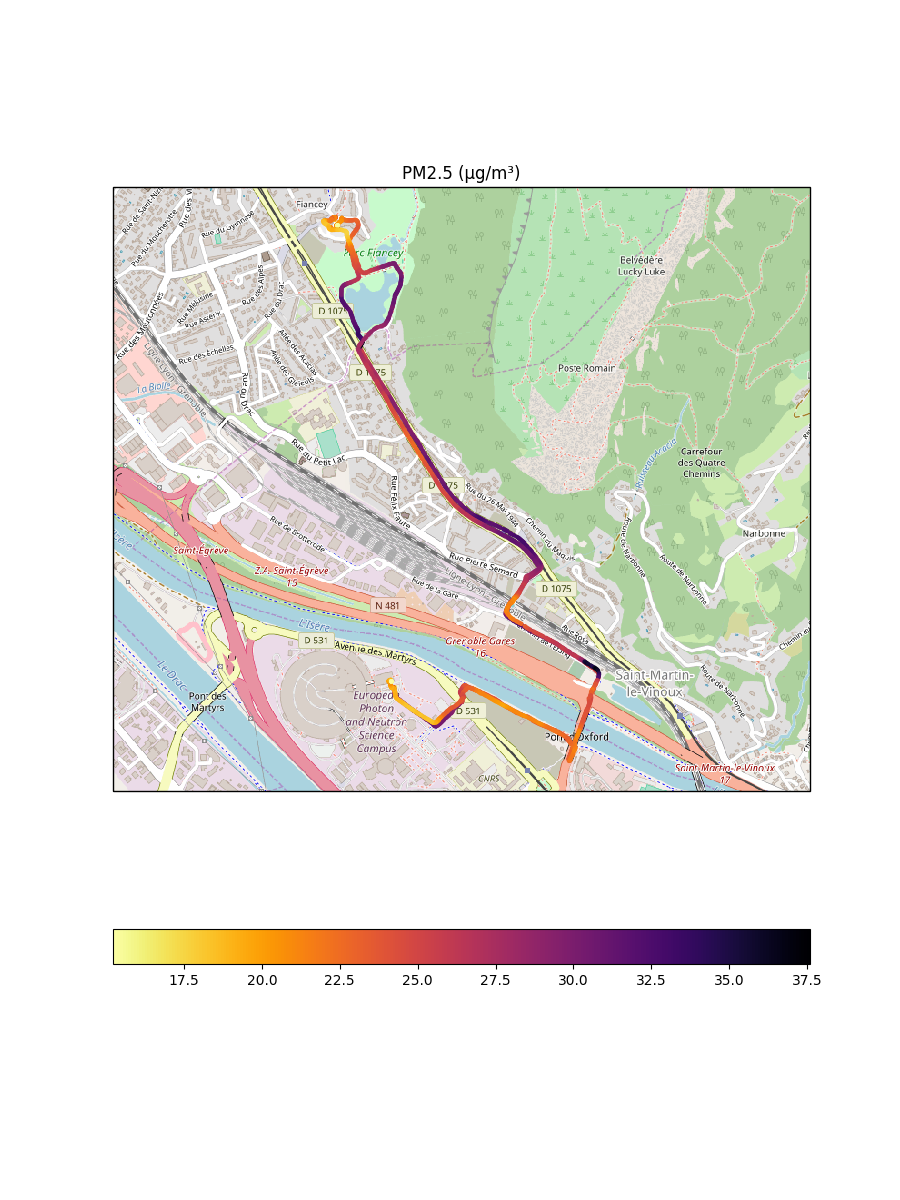

Text(0.5,1,'PM2.5 (µg/m³)')

In [15]:
fig, ax = subplots(subplot_kw={'projection': imagery.crs}, figsize=(9,12))
ax.set_extent(extent, crs=crs_latlon)
ax.add_image(imagery, 15)
sc = ax.scatter(gpt[:,1], gpt[:,0], transform=crs_latlon, c=gpt[:,2], s=5, cmap="inferno_r")
cbar = fig.colorbar(sc, orientation='horizontal')
ax.set_title("PM2.5 (µg/m³)")